In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 16.3 MB/s eta 0:00:00


In [ ]:
import os
from ultralytics import YOLO

from google.colab import drive
drive.mount('/content/drive')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounted at /content/drive


In [ ]:
# Путь к папке с распакованным датасетом
dataset_dir = '/content/drive/MyDrive/YOLO/dataset'

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tqdm import tqdm  # Библиотека для отображения прогресса


# Paths
src_labels_path = "/content/drive/MyDrive/YOLO/dataset/gtavid1/labels/train"
src_frames_path = "/content/drive/MyDrive/YOLO/dataset/gtavid1/frames/train"
dst_base_path = "/content/drive/MyDrive/YOLO/processed_dataset"

# Destination paths
dst_labels_path = os.path.join(dst_base_path, "labels")
dst_images_path = os.path.join(dst_base_path, "images")

# Train and validation split ratio
split_ratio = 0.8

# Collect all labels and corresponding frames
labels = sorted(os.listdir(src_labels_path))
frames = sorted(os.listdir(src_frames_path))



# Check correspondence
valid_pairs = [(label, label.replace(".txt", ".jpg")) for label in labels if label.replace(".txt", ".jpg") in frames]
# print(valid_pairs)
# Check if there are enough samples
# if len(valid_pairs) < 2:
#     train = valid_pairs
#     val = []
# else:
#     # Split dataset
train, val = train_test_split(valid_pairs, train_size=split_ratio, random_state=42)

print(len(train))
print(len(val))


# Helper function to organize files
def organize_files(pairs, subset):
    ex = True
    for label_file, frame_file in tqdm(pairs, desc=f"Processing {subset} files", unit="file"):
        # Create subset paths
        subset_labels_path = os.path.join(dst_labels_path, subset)
        subset_images_path = os.path.join(dst_images_path, subset)
        # os.makedirs(subset_labels_path, exist_ok=True)
        # os.makedirs(subset_images_path, exist_ok=True)

        # Paths for source and destination
        src_label_path = os.path.join(src_labels_path, label_file)
        dest_label_path = os.path.join(subset_labels_path, label_file)
        src_frame_path = os.path.join(src_frames_path, frame_file)
        dest_frame_path = os.path.join(subset_images_path, frame_file)

        # Move or copy label file
        if ex and os.path.exists(dest_label_path):
          continue

        ex = False

        shutil.move(src_label_path, dest_label_path)

        shutil.move(src_frame_path, dest_frame_path)

# Organize files into train and val
organize_files(train, "train")
organize_files(val, "val")

print("Dataset restructured and split successfully!")


6231
1558


Processing val files: 100%|██████████| 1558/1558 [00:13<00:00, 114.59file/s]

Dataset restructured and split successfully!


In [ ]:
import os

# Paths
train_images_path = "/content/drive/MyDrive/YOLO/processed_dataset/images/train"
val_images_path = "/content/drive/MyDrive/YOLO/processed_dataset/images/val"
train_txt_path = "/content/drive/MyDrive/YOLO/processed_dataset/train.txt"
val_txt_path = "/content/drive/MyDrive/YOLO/processed_dataset/val.txt"
data_yml_path = "/content/drive/MyDrive/YOLO/processed_dataset/data.yml"

# Function to generate .txt files
def generate_txt_file(dataset_path, output_file):
    with open(output_file, "w") as file:
        for root, _, files in os.walk(dataset_path):
            for img_file in sorted(files):
                if img_file.endswith((".jpg", ".png")):
                    img_path = os.path.join(root, img_file)
                    file.write(f"{img_path}\n")
    print(f"{output_file} created successfully.")

# Function to generate data.yml
def generate_data_yml(output_file, num_classes, train_txt, val_txt):
    data = f"""train: {train_txt}
val: {val_txt}

nc: {num_classes}
names: ['vehicle']  # Replace with actual class names
"""
    with open(output_file, "w") as file:
        file.write(data)
    print(f"{output_file} created successfully.")

# Generate train.txt
generate_txt_file(train_images_path, train_txt_path)

# Generate val.txt
generate_txt_file(val_images_path, val_txt_path)

# Generate data.yml
generate_data_yml(
    data_yml_path,
    num_classes=1,  # Replace with the actual number of classes
    train_txt=train_txt_path,
    val_txt=val_txt_path
)


/content/drive/MyDrive/YOLO/processed_dataset/train.txt created successfully.
/content/drive/MyDrive/YOLO/processed_dataset/val.txt created successfully.
/content/drive/MyDrive/YOLO/processed_dataset/data.yml created successfully.


In [ ]:
# Загружаем модель
model = YOLO('yolov8n.pt')  # Можно выбрать 'yolov8s.pt' для более точной модели

# Тренируем модель
model.train(
    data='/content/drive/MyDrive/YOLO/processed_dataset/data.yaml',  # Путь к вашему data.yaml
    epochs=30,          # Количество эпох
    batch=32,           # Размер батча
    save_period=10,
    imgsz=640,          # Размер изображения
    save=True,          # Сохранять результаты
    device=0            # Использовать GPU (0) или CPU ('cpu')
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 69.0MB/s]


Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/YOLO/processed_dataset/data.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=10, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

100%|██████████| 755k/755k [00:00<00:00, 14.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 66.6MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/YOLO/processed_dataset/labels/train... 15477 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15477/15477 [14:34<00:00, 17.70it/s]


train: New cache created: /content/drive/MyDrive/YOLO/processed_dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/YOLO/processed_dataset/labels/val... 2586 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2586/2586 [01:50<00:00, 23.32it/s]


val: New cache created: /content/drive/MyDrive/YOLO/processed_dataset/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.39G       1.12      1.023     0.9508        151        640: 100%|██████████| 484/484 [01:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.13it/s]


                   all       2586      18330      0.956      0.875      0.935      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.39G     0.8884     0.5427      0.891        147        640: 100%|██████████| 484/484 [01:19<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.57it/s]


                   all       2586      18330      0.959      0.918      0.957      0.778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.41G     0.8158     0.4846     0.8764        129        640: 100%|██████████| 484/484 [01:19<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.62it/s]

                   all       2586      18330      0.964      0.926      0.966      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.61G     0.7816     0.4605     0.8698        175        640: 100%|██████████| 484/484 [01:20<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.66it/s]

                   all       2586      18330      0.967      0.933      0.973      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.33G     0.7409     0.4337     0.8605        163        640: 100%|██████████| 484/484 [01:19<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.55it/s]

                   all       2586      18330      0.969      0.937      0.973      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30       4.4G     0.7083     0.4124     0.8532        190        640: 100%|██████████| 484/484 [01:19<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.53it/s]

                   all       2586      18330      0.975      0.938      0.977      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.38G      0.678     0.3934     0.8472        135        640: 100%|██████████| 484/484 [01:19<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.55it/s]

                   all       2586      18330      0.977      0.941      0.978      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.41G     0.6544     0.3794     0.8429        186        640: 100%|██████████| 484/484 [01:19<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.54it/s]

                   all       2586      18330      0.981      0.942       0.98      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.42G     0.6357     0.3687     0.8387        211        640: 100%|██████████| 484/484 [01:20<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.60it/s]

                   all       2586      18330      0.978      0.945      0.982      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.37G     0.6168     0.3583     0.8345        191        640: 100%|██████████| 484/484 [01:19<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.66it/s]

                   all       2586      18330      0.979      0.947      0.984      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.36G     0.6063     0.3503      0.834        191        640: 100%|██████████| 484/484 [01:19<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.63it/s]

                   all       2586      18330      0.982      0.949      0.984      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30       4.4G      0.589     0.3412     0.8309        163        640: 100%|██████████| 484/484 [01:19<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.54it/s]

                   all       2586      18330      0.981      0.952      0.985      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.39G     0.5772     0.3341     0.8282        140        640: 100%|██████████| 484/484 [01:19<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.53it/s]

                   all       2586      18330      0.983      0.951      0.986      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.59G     0.5657     0.3278     0.8261        112        640: 100%|██████████| 484/484 [01:19<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.61it/s]

                   all       2586      18330       0.98      0.954      0.986      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.56G     0.5549      0.321     0.8241        139        640: 100%|██████████| 484/484 [01:19<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.57it/s]

                   all       2586      18330      0.982      0.954      0.987      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.39G     0.5483     0.3177     0.8233        186        640: 100%|██████████| 484/484 [01:19<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.68it/s]

                   all       2586      18330      0.981      0.957      0.986      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.31G     0.5348     0.3087     0.8209        204        640: 100%|██████████| 484/484 [01:19<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.62it/s]

                   all       2586      18330      0.985       0.96      0.987      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.27G     0.5263     0.3045     0.8189        182        640: 100%|██████████| 484/484 [01:19<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.60it/s]

                   all       2586      18330      0.982       0.96      0.986      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.35G     0.5166     0.2988     0.8179        149        640: 100%|██████████| 484/484 [01:19<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.52it/s]

                   all       2586      18330      0.983       0.96      0.987      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30       4.4G     0.5068     0.2931     0.8148        237        640: 100%|██████████| 484/484 [01:19<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.54it/s]

                   all       2586      18330      0.982       0.96      0.987      0.918


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.34G     0.4811     0.2791     0.8131        130        640: 100%|██████████| 484/484 [01:18<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.61it/s]

                   all       2586      18330      0.984      0.959      0.987      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.33G     0.4652       0.27     0.8098        147        640: 100%|██████████| 484/484 [01:16<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.63it/s]

                   all       2586      18330      0.983       0.96      0.987      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.31G     0.4509     0.2619     0.8063         88        640: 100%|██████████| 484/484 [01:16<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.51it/s]

                   all       2586      18330      0.985      0.961      0.988      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.32G     0.4408     0.2567     0.8057         98        640: 100%|██████████| 484/484 [01:16<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.53it/s]

                   all       2586      18330      0.986      0.965      0.989       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.27G     0.4325     0.2526     0.8038        108        640: 100%|██████████| 484/484 [01:15<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.66it/s]

                   all       2586      18330      0.985      0.964      0.989      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.27G       0.42     0.2451     0.8018        119        640: 100%|██████████| 484/484 [01:16<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.50it/s]

                   all       2586      18330      0.987      0.963      0.989      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.31G      0.409     0.2394     0.7994        121        640: 100%|██████████| 484/484 [01:16<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.65it/s]

                   all       2586      18330      0.986      0.965      0.989      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.31G     0.3986     0.2339     0.8002        121        640: 100%|██████████| 484/484 [01:16<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.59it/s]

                   all       2586      18330      0.987      0.965       0.99      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.31G     0.3914     0.2293     0.7971        121        640: 100%|██████████| 484/484 [01:16<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.55it/s]

                   all       2586      18330      0.988      0.964       0.99      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.32G      0.384     0.2257     0.7976        114        640: 100%|██████████| 484/484 [01:16<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.64it/s]

                   all       2586      18330      0.988      0.964       0.99      0.938



30 epochs completed in 0.759 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:15<00:00,  2.72it/s]


                   all       2586      18330      0.988      0.964       0.99      0.938
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ea94c117a90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
import shutil
import os

# Пути
local_model_path = "runs/detect/train/weights/best.pt"  # Путь к обученной модели
drive_model_path = "/content/drive/MyDrive/YOLO/models/best_2.pt"    # Целевой путь на Google Диске

# Убедимся, что папка на Google Диске существует
os.makedirs(os.path.dirname(drive_model_path), exist_ok=True)

# Копируем модель
shutil.copy(local_model_path, drive_model_path)

print(f"Model successfully copied to: {drive_model_path}")


Model successfully copied to: /content/drive/MyDrive/YOLO/models/best_2.pt


In [ ]:
import shutil
import os

# Путь на Google Drive
drive_path = '/content/drive/MyDrive/YOLO/models/best_2.pt'
model = YOLO(drive_path)  # Можно выбрать 'yolov8s.pt' для более точной модели




image 1/1 /content/test_8.png: 384x640 2 vehicles, 48.4ms
Speed: 2.3ms preprocess, 48.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


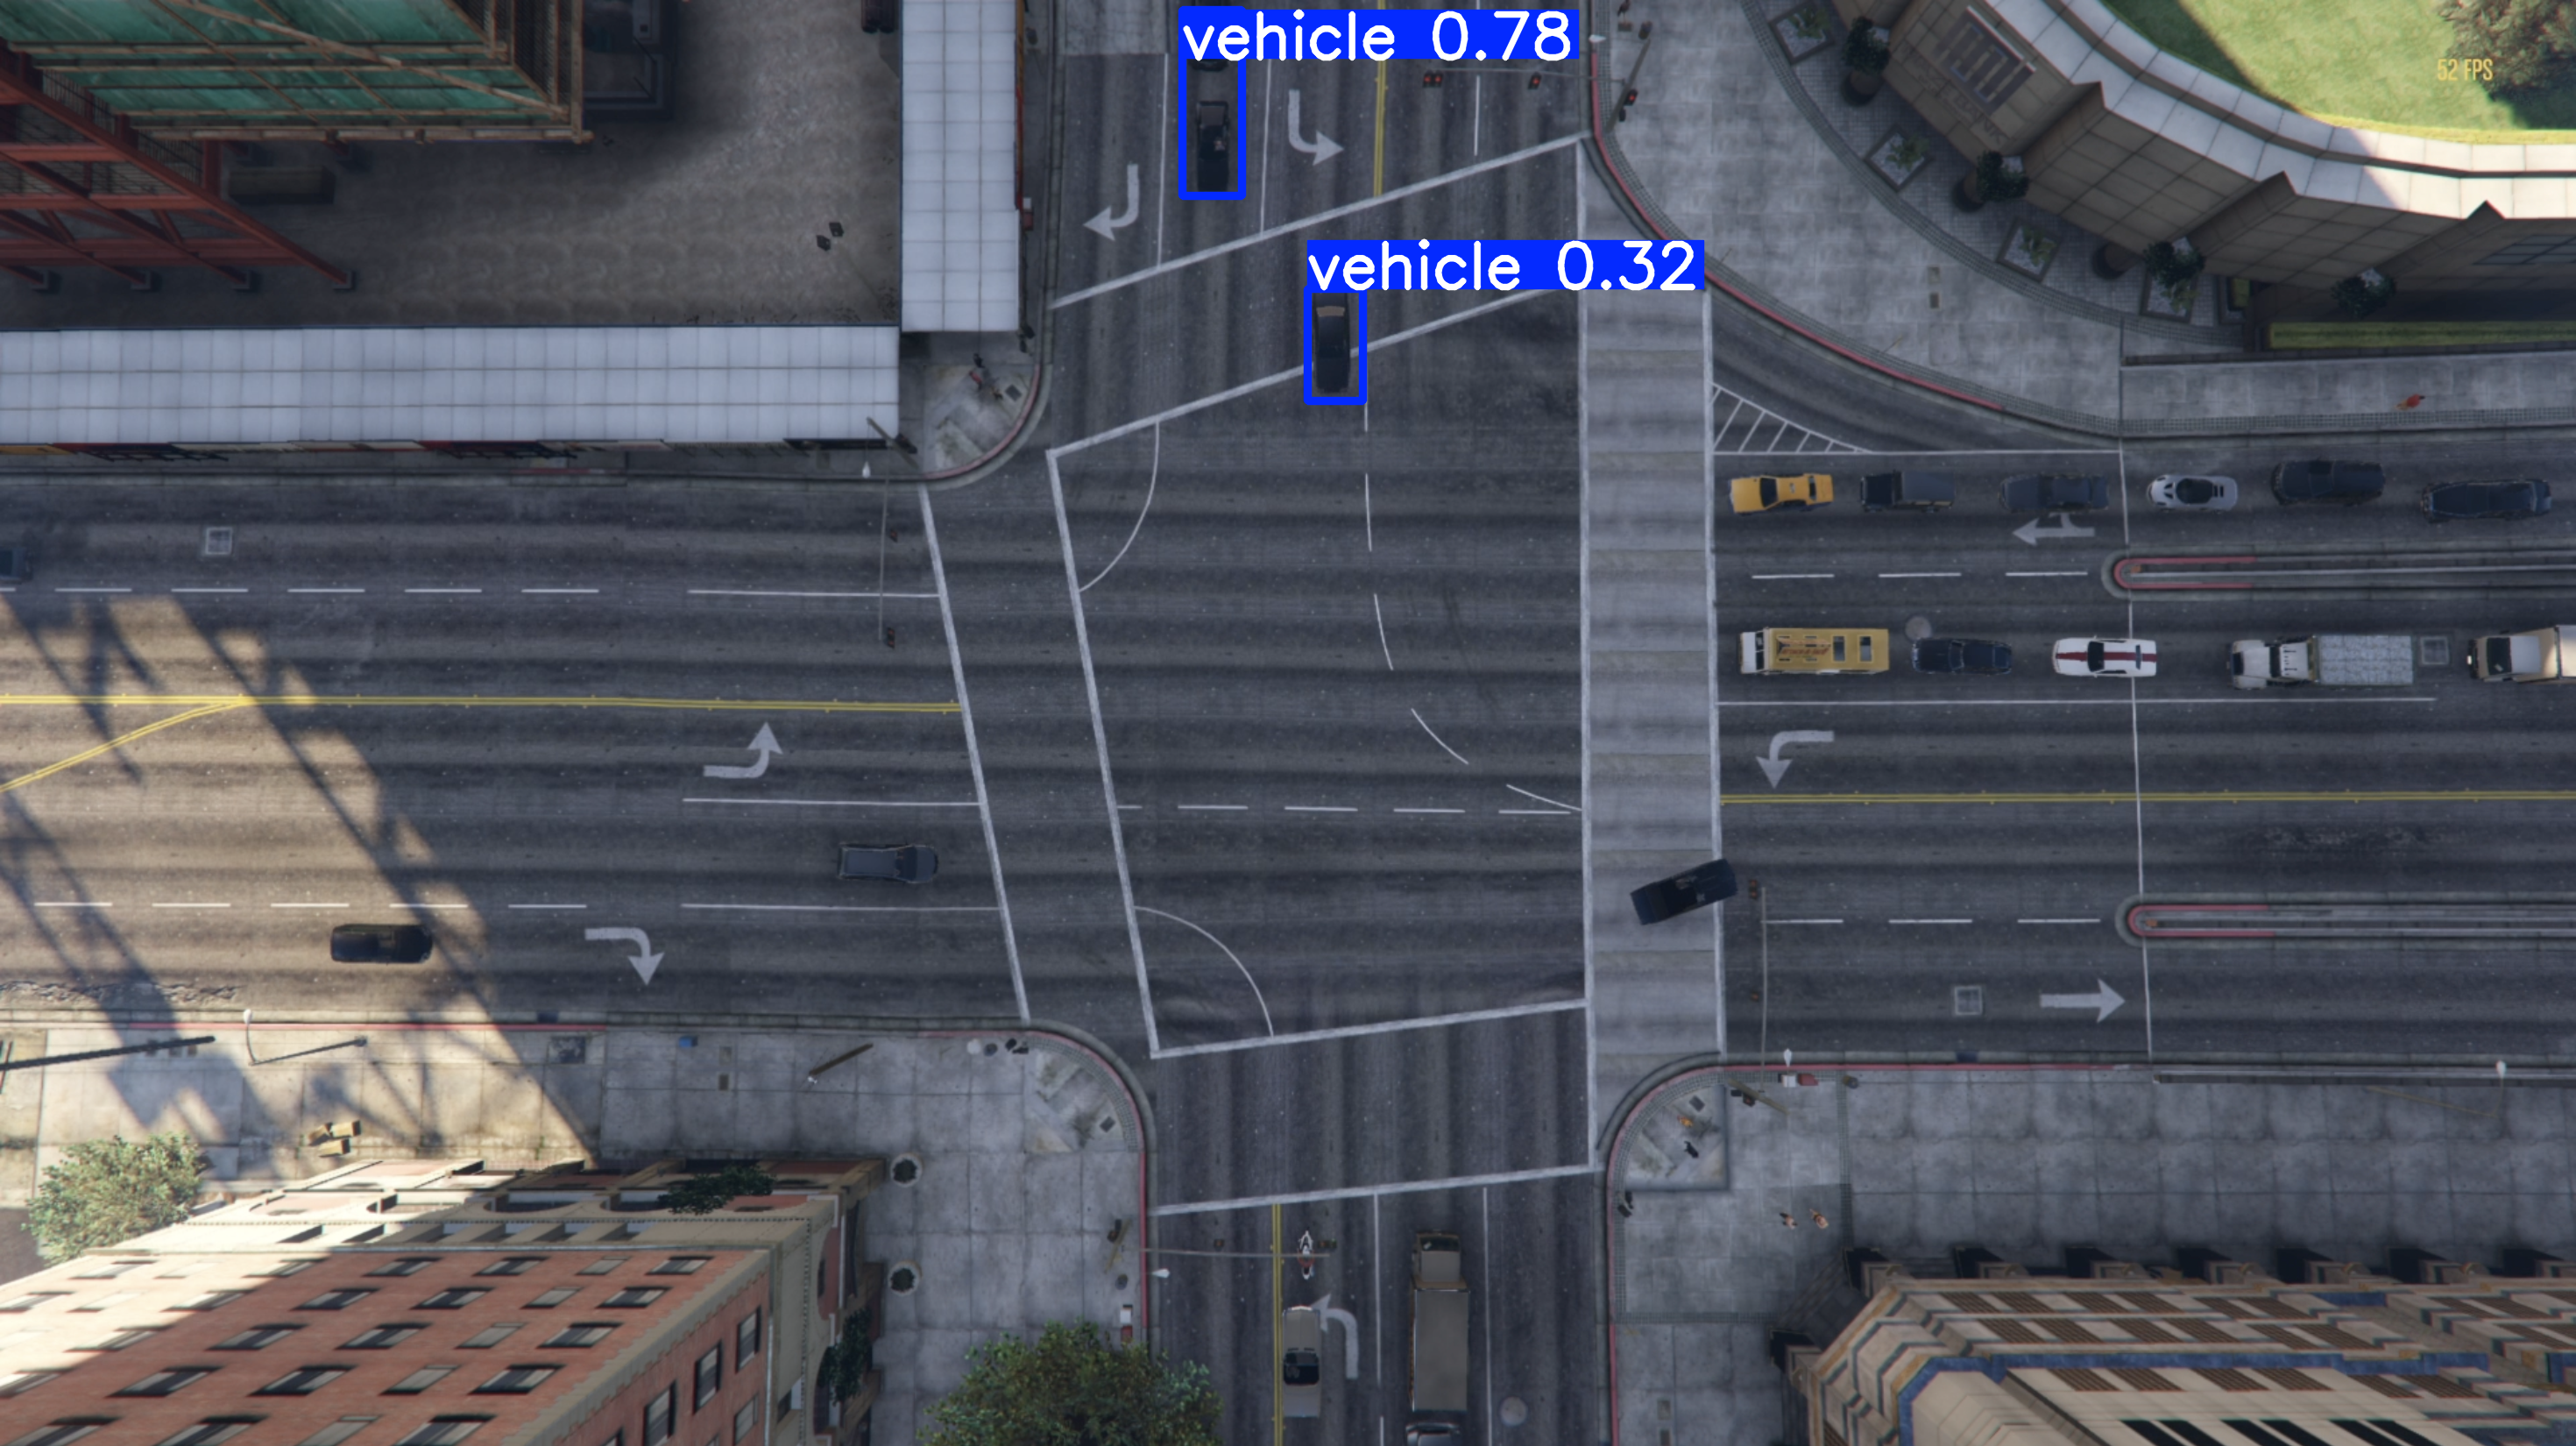

In [ ]:
# Путь к изображению для детекции
image_path = 'test_8.png'

# Выполнение детекции
results = model.predict(image_path, conf=0.2)

# Отображение изображения с детекцией
for result in results:
    result.show()  # Показать изображение с детекцией


In [ ]:
import cv2

def main():
    # Загружаем видео с камеры или файла
    video_path = 'test_vid_1.mp4'  # Укажите путь к файлу или оставьте 0 для использования камеры
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Не удалось открыть видео.")
        return

    # Создаем трекер CSRT
    tracker = cv2.TrackerCSRT_create()

    # Считываем первый кадр
    ret, frame = cap.read()
    if not ret:
        print("Не удалось получить первый кадр.")
        return

    # Выбор ROI (области интереса) для отслеживания
    roi = cv2.selectROI("Выберите объект для отслеживания", frame, False, False)
    cv2.destroyWindow("Выберите объект для отслеживания")

    # Инициализируем трекер с выбранным ROI
    tracker.init(frame, roi)

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Кадры закончились или возникла ошибка.")
            break

        # Обновляем трекер и получаем новое положение объекта
        ret, bbox = tracker.update(frame)

        if ret:
            # Отображаем прямоугольник вокруг отслеживаемого объекта
            x, y, w, h = map(int, bbox)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        else:
            # Если объект не найден, выводим сообщение
            cv2.putText(frame, "Object lost", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        # Показываем кадр
        cv2.imshow("Tracking", frame)

        # Прерываем цикл по нажатию клавиши 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

main()


Не удалось открыть видео.
